In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv('Real estate.csv')

In [3]:
inputData = ""
outputData = ""

def initialiseData():
    global outputData
    global inputData
    outputData = df.iloc[:,7]
    inputData = df.iloc[:,1:7]

def meanData(inputData):
    return np.mean(inputData)

def sdData(inputData):
    return np.std(inputData)

initialiseData()

In [4]:
numColumns = inputData.shape[1]
startingWeight = np.zeros(numColumns+1)

In [5]:
def normaliseData(inputData):
    meanInput = meanData(inputData)
    stdInput = sdData(inputData)
    return ((inputData-meanInput)/stdInput)

def plotData(plt,k):
    plt.xlabel('No. of Iterations')
    plt.ylabel('RMSE')
    str1 = "RMSE vs Iterations for k = " + str(k)
    plt.title(str1)
    plt.legend()
    plt.show()
    

In [6]:
def summation(inputData,outputData,numRows):
    sum = 0
    i=0
    while i < numRows:
        sum = sum + (outputData.iloc[i] - np.dot(inputData.iloc[i],startingWeight))*inputData.iloc[i]
        i = i+1
    return sum
    
def insertCol(inputData):
    value = pd.DataFrame(np.ones(inputData.shape[0]))
    inputData.insert(0,"Bias weight",value)

def gradientDescent(iterations,learningRate,startingWeight,inputData,outputData,numColumns,xCor,yCor,plotInput,testOutput,rowsPerFold,trainOutputStd,trainOutputMean):
    insertCol(inputData)
    numRows = inputData.shape[0]
    # loss = 0
    for i in range(iterations):
        tempWeight = np.zeros(numColumns+1)
        tempWeight = startingWeight + learningRate*(summation(inputData,outputData,numRows)/numRows)
        startingWeight = tempWeight
        valY = loss(rowsPerFold,startingWeight,plotInput,trainOutputStd,trainOutputMean,testOutput)
        xCor.append(i)
        yCor.append(valY)
    return startingWeight
    

def loss(rowsPerFold,newWeight,testInput,trainOutputStd,trainOutputMean,testOutput):
    currLoss=0
    j=0
    while j< rowsPerFold:
        predictedNormalised = newWeight[0]+np.dot(newWeight[1:],testInput.iloc[j])
        predicted = predictedNormalised*trainOutputStd+trainOutputMean
        currLoss += (predicted-testOutput.iloc[j])**2
        j = j+1
    currLoss = currLoss/rowsPerFold
    currLoss = np.sqrt(currLoss)
    return currLoss
    
    

In [7]:
def kFold(k,iterations,learningRate,startingWeight):
    numColumns = inputData.shape[1]
    totalRows = inputData.shape[0]
    rowsPerFold = int(totalRows/k)
    averageLoss = 0
    i=0
    while i<k:
        xCor = []
        yCor = []
        start = i*rowsPerFold
        end = start+rowsPerFold
        testInput = inputData[start:end]
        testOutput = outputData[start:end]
        trainInput = inputData.drop(inputData.index[start:end])
        trainOutput = outputData.drop(outputData.index[start:end])
        trainInputMean = meanData(trainInput)
        trainInputStd = sdData(trainInput)
        trainOutputMean = meanData(trainOutput)
        trainOutputStd = sdData(trainOutput)
        trainInput = normaliseData(trainInput)
        trainOutput = normaliseData(trainOutput)
        plotInput = (testInput-trainInputMean)/trainInputStd
        
        startingWeight = np.zeros(numColumns+1)
        startingWeight = gradientDescent(iterations,learningRate,startingWeight,trainInput,trainOutput,numColumns,xCor,yCor,plotInput,testOutput,rowsPerFold,trainOutputStd,trainOutputMean)
        averageLoss += loss (rowsPerFold,startingWeight,plotInput,trainOutputStd,trainOutputMean,testOutput)

        Label = "The K value is "+str((i+1))
        plt.plot(xCor, yCor, label = Label)
        i = i+1
    plotData(plt,k)
    averageLoss = averageLoss/k
    return averageLoss




In [8]:
def runGD(k,learningRate,iterations):
    print("Learning Rate: ",learningRate," Iterations: ",iterations," k: ",k)
    averageLoss = kFold(k,iterations,learningRate,startingWeight)
    print("Average Loss: ",averageLoss)

Learning Rate:  0.0005  Iterations:  500  k:  4


c:\Users\Vibhor\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\Vibhor\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\Vibhor\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\Vibhor\anaconda3\li

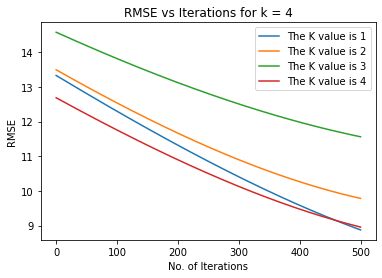

Average Loss:  9.793230561567986


In [9]:
runGD(4,0.0005,500)